# Figure S1: PIC OHC

This notebook will reproduce Figure S1 from the supplementary info of *Ocean Heat Content responses to changing Anthropogenic Aerosol Forcing Strength: regional and multi-decadal variability*, E. Boland et al. 2022 ([pre-print](https://doi.org/10.1002/essoar.10511062.1)). This will require utils.py (expects to find it in ../code) and input datafiles (expects to find them in ../data_in) to run - please see the README for details.

The data files loaded were created as follows:
- The Pre-Industrial Control Global Ocean Heat Content was calculated in ohc_pic_drift.py, producing ohc_pic_global.nc

Please attribute any plots or code from this notebook using the DOI from Zenodo: [10.5281/zenodo.6418479](https://doi.org/10.5281/zenodo.6418479)

E Boland Aug 2022 [emmomp@bas.ac.uk](email:emmomp@bas.ac.uk)

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0,'../code/')
import utils

In [2]:
# Directories for saving plots and finding input data
figs_dir = '../figs/' # Where you want the plots saved
data_dir='../data_in/' # Where the input data is (see README)

# Experiment info, don't alter
Year0=[1850,1885,1930,1970,2140] #Initialisation years for different runs

In [3]:
# Load global ohc from pic run and change time coord to number of years
pic_ohc=xr.open_dataset(data_dir+'pic_data/ohc_pic_global.nc')
pic_ohc=pic_ohc.assign_coords({'time_years':(('time',),np.arange(0,500,1/12))})
pic_ohc=pic_ohc.swap_dims({'time':'time_years'})

In [4]:
# Define anomalies wrt t=0, find values at initialisation years
pic_anom=pic_ohc.ohc-pic_ohc.ohc.isel(time_years=0)
pic_Year0=pic_anom.sel(time_years=list(np.array(Year0)-1850))

In [8]:
# Linear fit as used to define drift
drift_fit=utils.lin_regress(pic_anom.time_years,pic_anom/1e18,[['time_years',],['time_years',]])
pic_lin=pic_anom['time_years']*drift_fit.sel(parameter='slope')+drift_fit.sel(parameter='intercept')

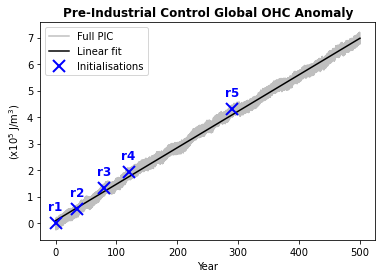

In [11]:
(pic_anom/1e5).plot(x='time_years',label='Full PIC',alpha=0.5,color='gray')
(pic_lin*1e18/1e5).plot(x='time_years',label='Linear fit',color='black')
(pic_Year0/1e5).plot(x='time_years',label='Initialisations',linestyle='',marker='x',markersize=12,markeredgewidth=2,color='b')
plt.xlabel('Year')
plt.ylabel('(x$10^{5}$ J/m$^3$)')
plt.legend()
plt.title('Pre-Industrial Control Global OHC Anomaly',fontsize=12,fontweight='bold')
for ir in range(0,5):
    plt.text(pic_Year0['time_years'][ir],pic_Year0[ir]/1e5+0.5,'r{}'.format(ir+1),color='b',ha='center',fontsize=12,fontweight='bold')
plt.savefig(figs_dir+'SIFig_PIC_OHC.png')